# Kieron Pollard IPL matches Win and Loss percentage Analysis

## Problem Statement
  ## when pollard plays >=22 balls in a match MI wins 83% of the times

### Import requirements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Reading and cleaning

In [88]:
df = pd.read_excel(r"C:\Users\KHOWSIK\Documents\sports data\Pollard project Analysis\pollard_ipl_matches.xlsx")
df.head()

,match_id,match_date,opponent_team,batting_innings,over,ball no,batting_position,balls_faced,runs_scored,4s,6s,strike_rate,dismissal_kind,Match result
0,1082592,2017-04-06,Rising Pune Supergiant,1st,13,4,7,17,27,3,1,158.82,caught,No
1,1082597,2017-04-09,Kolkata Knight Riders,2nd,12,2,6,17,17,1,1,100.00,caught,Yes
2,1082600,2017-04-12,Sunrisers Hyderabad,2nd,10,1,5,11,11,0,1,100.00,caught,Yes
3,1082602,2017-04-14,Royal Challengers Bangalore,2nd,2,5,6,47,70,3,5,148.94,caught,Yes
4,1082606,2017-04-16,Gujarat Lions,2nd,11,2,5,23,39,2,3,169.57,caught,Yes


In [14]:
df[df['runs_scored'] >=80]

,match_id,match_date,opponent_team,batting_innings,over,ball no,batting_position,balls_faced,runs_scored,4s,6s,strike_rate,dismissal_kind,Match result
31,1178399,2019-04-10,Kings XI Punjab,2nd,7,5,4,31,83,3,10,267.74,caught,Yes
64,1254084,2021-05-01,Chennai Super Kings,2nd,9,5,5,34,87,6,8,255.88,Not Out,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   match_id          189 non-null    int64         
 1   match_date        189 non-null    datetime64[ns]
 2   opponent_team     189 non-null    object        
 3   batting_innings   189 non-null    object        
 4   over              189 non-null    int64         
 5   ball              189 non-null    int64         
 6   batting_position  189 non-null    object        
 7   balls_faced       189 non-null    int64         
 8   runs_scored       189 non-null    int64         
 9   4s                189 non-null    int64         
 10  6s                189 non-null    int64         
 11  strike_rate       189 non-null    float64       
 12  dismissal_kind    189 non-null    object        
 13  Match result      189 non-null    object        
dtypes: datetime64[ns](1), floa

In [33]:
df.isnull().sum()

match_id            0
match_date          0
opponent_team       0
batting_innings     0
over                0
ball no             0
batting_position    0
balls_faced         0
runs_scored         0
4s                  0
6s                  0
strike_rate         0
dismissal_kind      0
Match result        0
dtype: int64

In [5]:
df.describe()

,match_id,match_date,over,ball,balls_faced,runs_scored,4s,6s,strike_rate
count,1.890000e+02,189,189.000000,189.000000,189.000000,189.00000,189.000000,189.000000,189.000000
mean,8.901329e+05,2016-03-05 11:02:51.428571392,10.714286,3.248677,12.253968,18.05291,1.153439,1.179894,120.467937
min,4.191140e+05,2010-03-17 00:00:00,-1.000000,-1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,5.980110e+05,2013-04-13 00:00:00,8.000000,2.000000,6.000000,5.00000,0.000000,0.000000,70.000000
50%,9.809090e+05,2016-04-13 00:00:00,12.000000,3.000000,11.000000,13.00000,1.000000,1.000000,111.110000
75%,1.178411e+06,2019-04-20 00:00:00,15.000000,5.000000,18.000000,24.00000,2.000000,1.000000,176.920000
max,1.304102e+06,2022-05-09 00:00:00,19.000000,9.000000,48.000000,87.00000,7.000000,10.000000,440.000000
std,3.025600e+05,NaN,5.361690,2.223320,9.687624,18.50208,1.509809,1.747161,83.544547


### Data Pre Visualization Analysis

Rows: 189  Columns: 14
Columns: ['match_id', 'match_date', 'opponent_team', 'batting_innings', 'over', 'ball no', 'batting_position', 'balls_faced', 'runs_scored', '4s', '6s', 'strike_rate', 'dismissal_kind', 'Match result']
No Missing Values Found


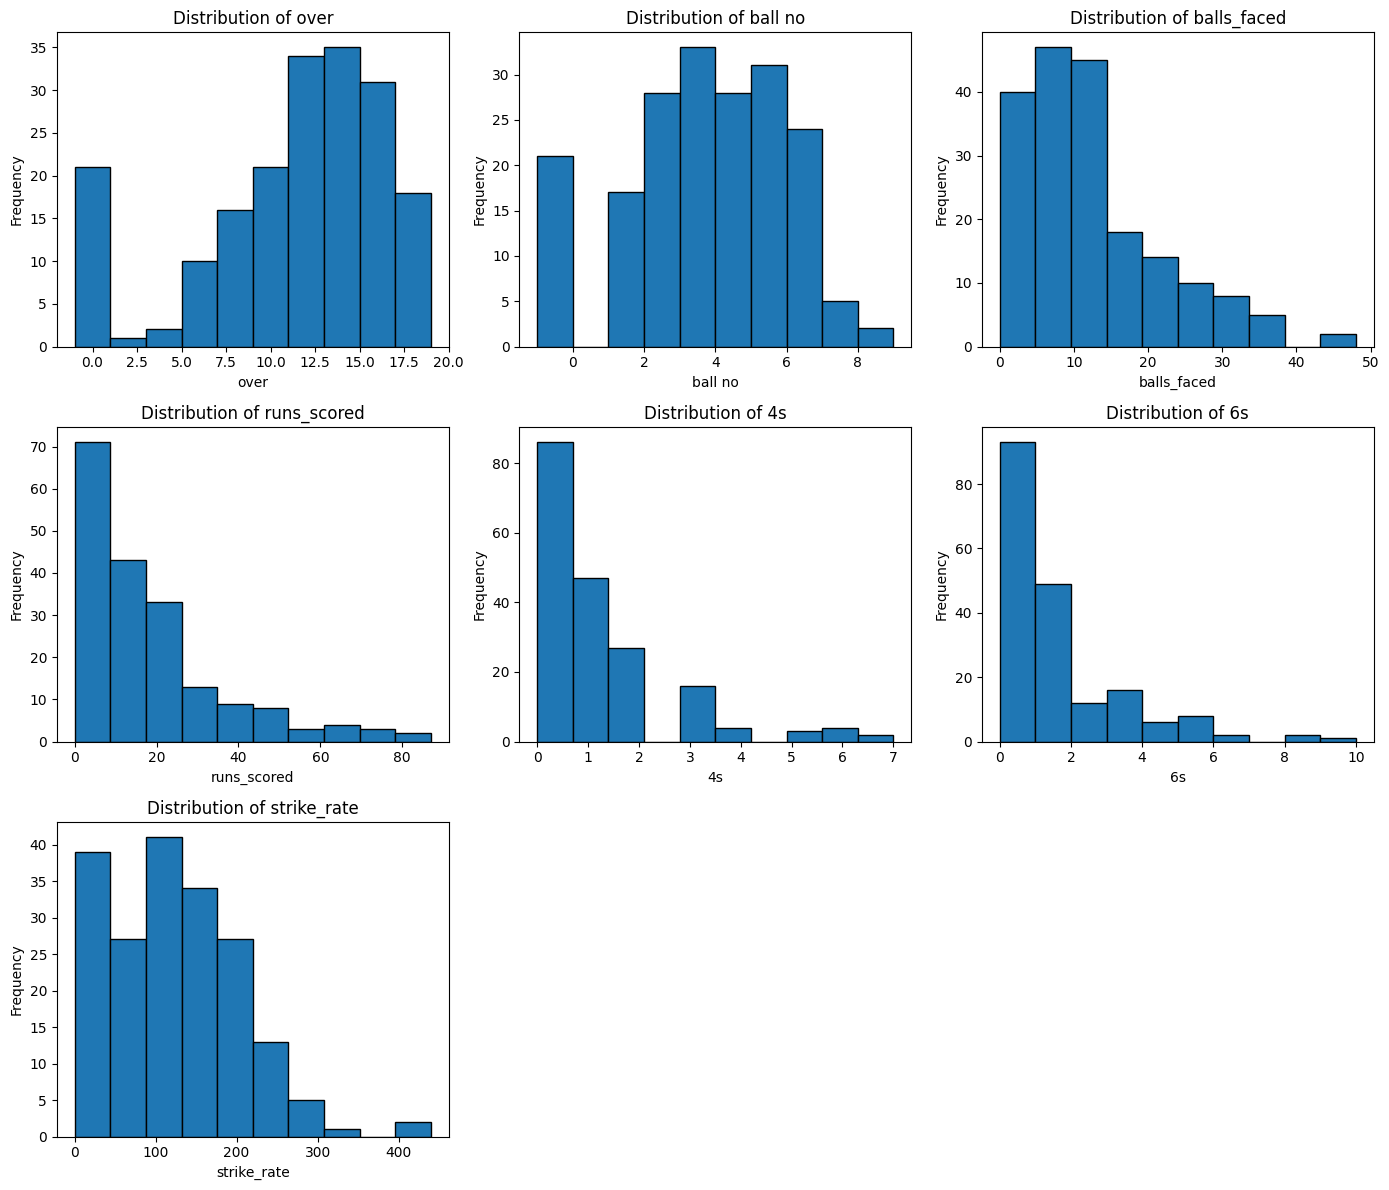

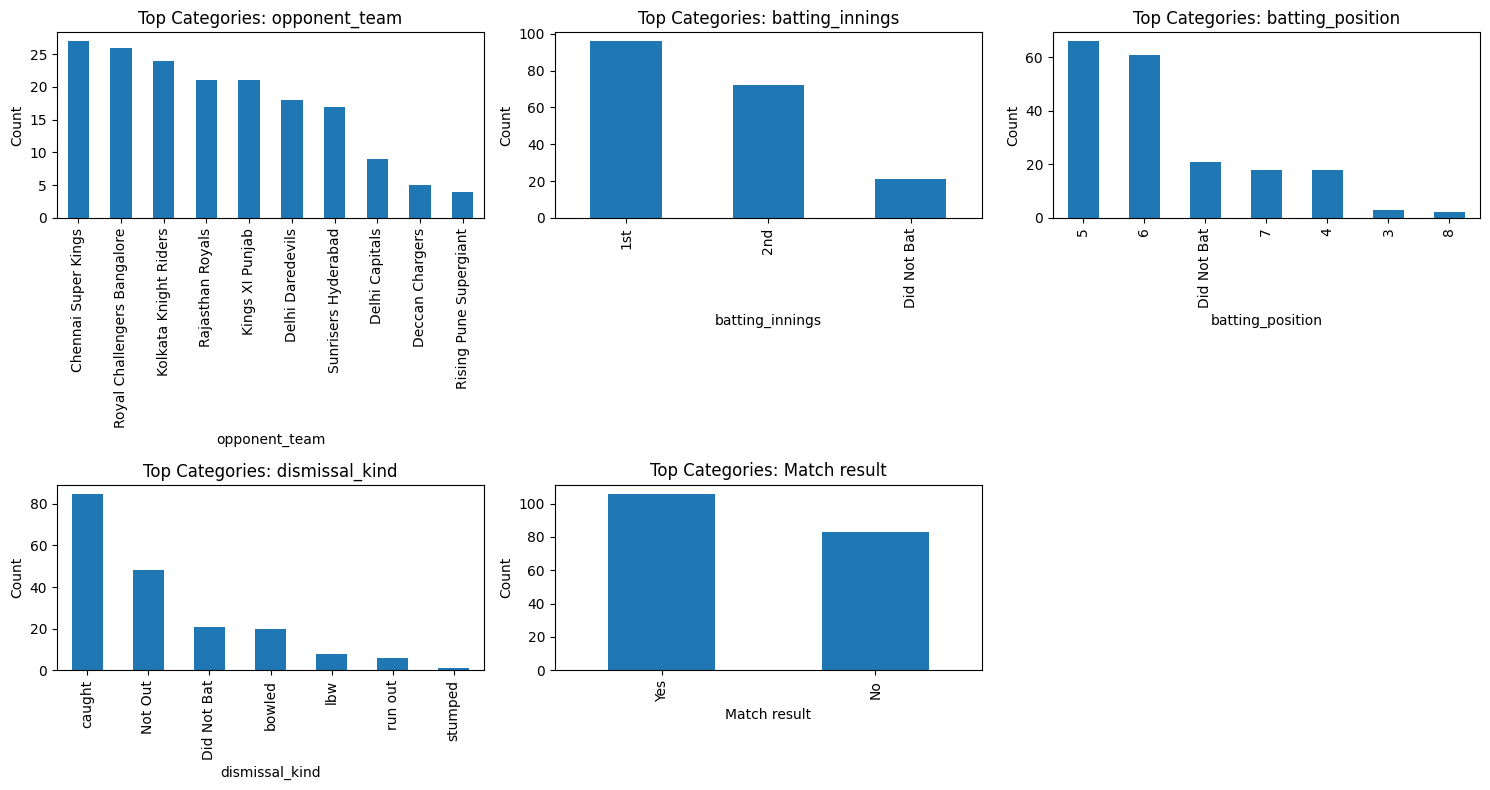

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Load dataset
df = pd.read_excel(r"C:\Users\KHOWSIK\Documents\sports data\Pollard project Analysis\pollard_ipl_matches.xlsx")

print("Rows:", len(df), " Columns:", len(df.columns))
print("Columns:", list(df.columns))

# -----------------------------------------
# 1️ Missing Value Visualization (Subplot)
# -----------------------------------------
missing = df.isnull().sum()
missing = missing[missing > 0]

if len(missing) > 0:
    rows = math.ceil(len(missing) / 3)
    fig, axes = plt.subplots(rows, 3, figsize=(14, 4 * rows))
    axes = axes.flatten()

    for i, col in enumerate(missing.index):
        axes[i].bar(col, missing[col],edgecolor='black')
        axes[i].set_title(f"Missing: {col}")
        axes[i].set_ylabel("Count")
        axes[i].set_xticklabels([col], rotation=45)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
else:
    print("No Missing Values Found")

# -----------------------------------------
# 2️ Numeric Columns (Histograms Subplots)
# -----------------------------------------
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
if "match_id" in numeric_cols:
    numeric_cols.remove("match_id")

if numeric_cols:
    rows = math.ceil(len(numeric_cols) / 3)
    fig, axes = plt.subplots(rows, 3, figsize=(14, 4 * rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        axes[i].hist(df[col].dropna(), bins=10,edgecolor='black')
        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequency")

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
else:
    print("No Numeric Columns")

# -----------------------------------------
# 3 Categorical Columns (Bar Subplots)
# -----------------------------------------
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

if categorical_cols:
    rows = math.ceil(len(categorical_cols) / 3)
    fig, axes = plt.subplots(rows, 3, figsize=(15, 4 * rows))
    axes = axes.flatten()

    for i, col in enumerate(categorical_cols):
        df[col].value_counts().head(10).plot(kind='bar', ax=axes[i])
        axes[i].set_title(f"Top Categories: {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Count")

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
else:
    print("No Categorical Columns")


### 1. Our Problem Statement is to find the MI wins probability when pollard plays >=22 balls in a match

#### filtering data

In [46]:
# filtering only those matches where pollard plays >=22 balls in a match

pollard_22_balls = df[df['balls_faced']>=22]
pollard_22_balls

,match_id,match_date,opponent_team,batting_innings,over,ball no,batting_position,balls_faced,runs_scored,4s,6s,strike_rate,dismissal_kind,match result
3,1082602,2017-04-14,Royal Challengers Bangalore,2nd,2,5,6,47,70,3,5,148.94,caught,Yes
4,1082606,2017-04-16,Gujarat Lions,2nd,11,2,5,23,39,2,3,169.57,caught,Yes
6,1082614,2017-04-22,Delhi Daredevils,1st,7,3,5,29,26,4,0,89.66,caught,Yes
10,1082635,2017-05-06,Delhi Daredevils,1st,8,5,3,35,63,5,4,180.00,Not Out,Yes
12,1082641,2017-05-11,Kings XI Punjab,2nd,11,5,5,24,50,1,5,208.33,Not Out,No
18,1136567,2018-04-12,Sunrisers Hyderabad,1st,8,7,6,23,28,3,2,121.74,caught,No
24,1136610,2018-05-16,Kings XI Punjab,1st,8,3,6,23,50,5,3,217.39,caught,Yes
30,1178394,2019-04-06,Sunrisers Hyderabad,1st,11,5,6,26,46,2,4,176.92,Not Out,Yes
31,1178399,2019-04-10,Kings XI Punjab,2nd,7,5,4,31,83,3,10,267.74,caught,Yes
41,1181768,2019-05-12,Chennai Super Kings,1st,12,5,6,25,41,3,3,164.00,Not Out,Yes


In [49]:

total_matches_22_balls = len(pollard_22_balls) 
print('Total matches with >= 22 balls:',total_matches_22_balls)
# so pollard faces >=22 balls in 30 matches out of 189 matches for mi in ipl
pollard_matchwins_with_22_balls = pollard_22_balls[pollard_22_balls['match result']=='Yes']
#print('total_match_win_with >= 22balls:',pollard_matchwins_with_22_balls)
total_match_win_with_22balls=len(pollard_matchwins_with_22_balls)
print('Total_match_win_with >= 22balls:',total_match_win_with_22balls)

Total matches with >= 22 balls: 30
Total_match_win_with >= 22balls: 20


#### 1.1  Visulaization of match win and loss Counts for matches where pollard plays >=22 balls

Matches where Pollard faced ≥ 22 balls: 30
Wins (≥ 22 balls): 20
Losses (≥ 22 balls): 10


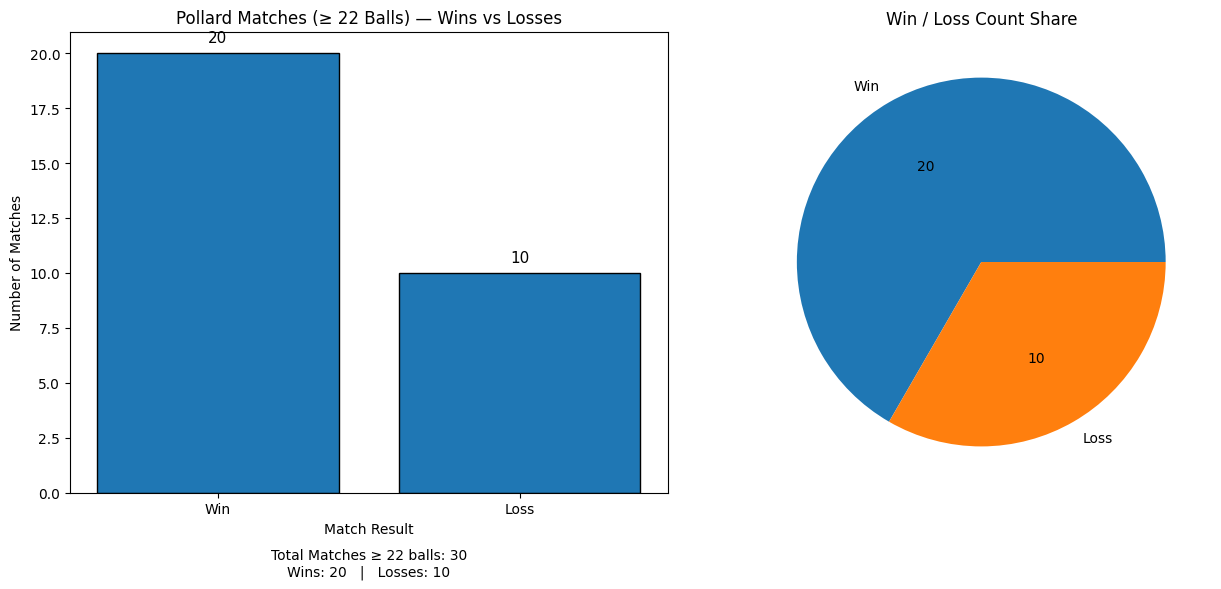

In [56]:
# Counts
total_matches_22_balls = len(pollard_22_balls)

wins_22 = len(pollard_22_balls[pollard_22_balls['match result'] == 'Yes'])
loss_22 = total_matches_22_balls - wins_22

print("Matches where Pollard faced ≥ 22 balls:", total_matches_22_balls)
print("Wins (≥ 22 balls):", wins_22)
print("Losses (≥ 22 balls):", loss_22)

# ---------- Visualization ----------
import matplotlib.pyplot as plt

labels = ['Win', 'Loss']
values = [wins_22, loss_22]

fig, axes = plt.subplots(1, 2, figsize=(13, 6))

# Bar Chart using COUNT
bars = axes[0].bar(labels, values, edgecolor='black')
axes[0].set_title("Pollard Matches (≥ 22 Balls) — Wins vs Losses")
axes[0].set_ylabel("Number of Matches")
axes[0].set_xlabel("Match Result")

# Count labels on bars
for bar, v in zip(bars, values):
    axes[0].text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 0.5,
        f"{v}",
        ha='center',
        fontsize=11
    )

# Summary text aligned neatly
summary_text = (
    f"Total Matches ≥ 22 balls: {total_matches_22_balls}\n"
    f"Wins: {wins_22}   |   Losses: {loss_22}"
)
axes[0].text(
    0.5, -0.18,
    summary_text,
    transform=axes[0].transAxes,
    ha='center',
    fontsize=10
)

# Pie chart using counts (not percentages)
axes[1].pie(values, labels=labels, autopct=lambda p: f"{int(round(p*total_matches_22_balls/100))}")
axes[1].set_title("Win / Loss Count Share")

plt.tight_layout()
plt.show()


#### Calculation of Pollards Match Win and Loss percentage with >=22 balls

In [26]:
win_percentage = (total_match_win_with_22balls/total_matches_22_balls)*100
loss_percentage = 100-win_percentage
print(f"Pollards Match Win percentage with >=22 balls: {win_percentage:.2f}%")
print(f"Pollards Match Loss percentage with >=22 balls: {loss_percentage:.2f}%")

Pollards Match Win percentage with >=22 balls: 66.67%
Pollards Match Loss percentage with >=22 balls: 33.33%


#### 1.2 Visualization of Calculation of Pollards Match Win and Loss percentage with >=22 balls

Matches where Pollard faced ≥ 22 balls: 30
Wins: 20
Losses: 10

Percentage Breakdown:
match result
Yes    66.666667
No     33.333333
Name: count, dtype: float64


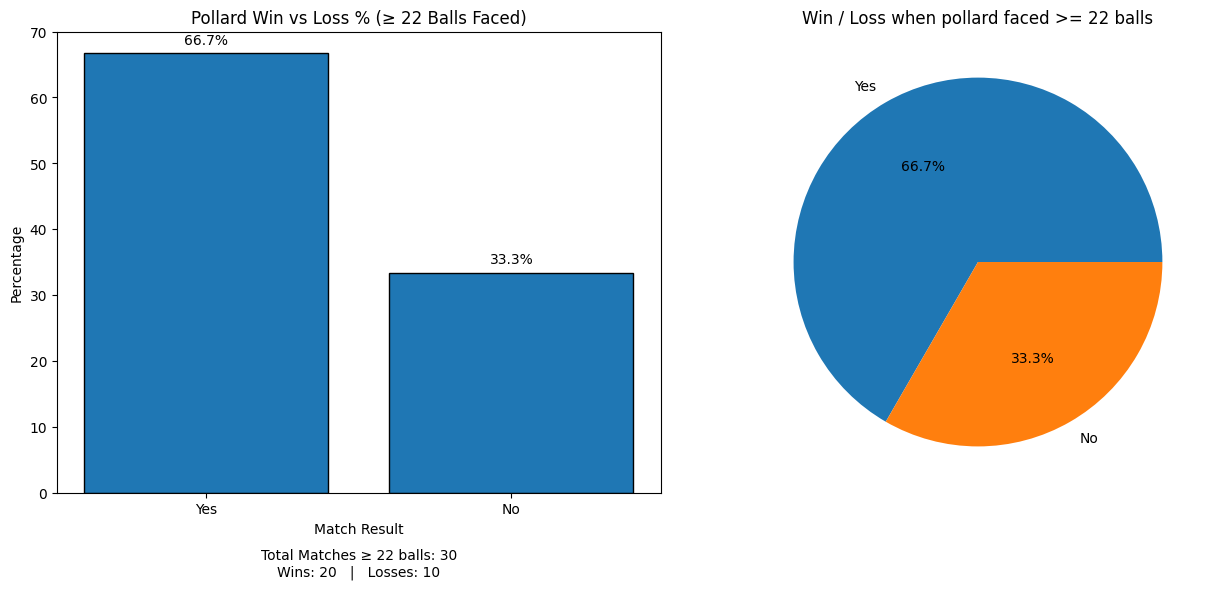

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------------------
# Pollard Win / Loss % when Balls Faced ≥ 22
# -----------------------------------------
df.columns = df.columns.str.strip().str.lower()

# Detect column names
balls_col = next((c for c in df.columns if "ball" in c and "face" in c), None)
result_col = next((c for c in df.columns if "result" in c), None)

if balls_col is None or result_col is None:
    print("Required columns not found. Please verify 'balls faced' & 'match result' columns.")
else:
    filtered_df = df[df[balls_col] >= 22]

    total_matches = len(filtered_df)

    win_loss_counts = filtered_df[result_col].value_counts()

    wins = win_loss_counts.get("Yes", win_loss_counts.get("Yes", 0))
    losses = win_loss_counts.get("No", win_loss_counts.get("No", 0))

    percentages = (win_loss_counts / total_matches) * 100

    print("Matches where Pollard faced ≥ 22 balls:", total_matches)
    print("Wins:", wins)
    print("Losses:", losses)
    print("\nPercentage Breakdown:")
    print(percentages)

    # -------- Visualization --------
    fig, axes = plt.subplots(1, 2, figsize=(13, 6))

    # ---------------- BAR CHART ----------------
    bars = axes[0].bar(percentages.index, percentages.values, edgecolor='black')

    axes[0].set_title("Pollard Win vs Loss % (≥ 22 Balls Faced)", fontsize=12)
    axes[0].set_ylabel("Percentage")
    axes[0].set_xlabel("Match Result")

    # Add percentage labels on bars
    for bar, value in zip(bars, percentages.values):
        axes[0].text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 1,
            f"{value:.1f}%",
            ha='center',
            va='bottom',
            fontsize=10
        )

    # Add summary text aligned neatly under title
    summary_text = (
        f"Total Matches ≥ 22 balls: {total_matches}\n"
        f"Wins: {wins}   |   Losses: {losses}"
    )
    axes[0].text(
        0.5, -0.18,
        summary_text,
        transform=axes[0].transAxes,
        ha='center',
        fontsize=10
    )

    # ---------------- PIE CHART ----------------
    axes[1].pie(
        percentages.values,
        labels=percentages.index,
        autopct='%1.1f%%'
    )
    axes[1].set_title("Win / Loss when pollard faced >= 22 balls", fontsize=12)

    plt.tight_layout()
    plt.show()


### 2. General win percentage of Pollards played with total 189 matches in ipl

In [20]:
total_matches_189 = len(df)
total_win_189 = len(df[df['Match result']== 'Yes'])
print( "total matches played : ",total_matches_189)
print("total matches win out of 189 :",total_win_189)
win_percentage_189= (total_win_189/total_matches_189)*100
loss_percentage_189= 100 - win_percentage_189
print(f"win percentage : {win_percentage_189:.2f} %")
print(f"loss percentage : {loss_percentage_189:.2f} %")

total matches played :  189
total matches win out of 189 : 106
win percentage : 56.08 %
loss percentage : 43.92 %


#### 2.1 Visualzation general win % of MI

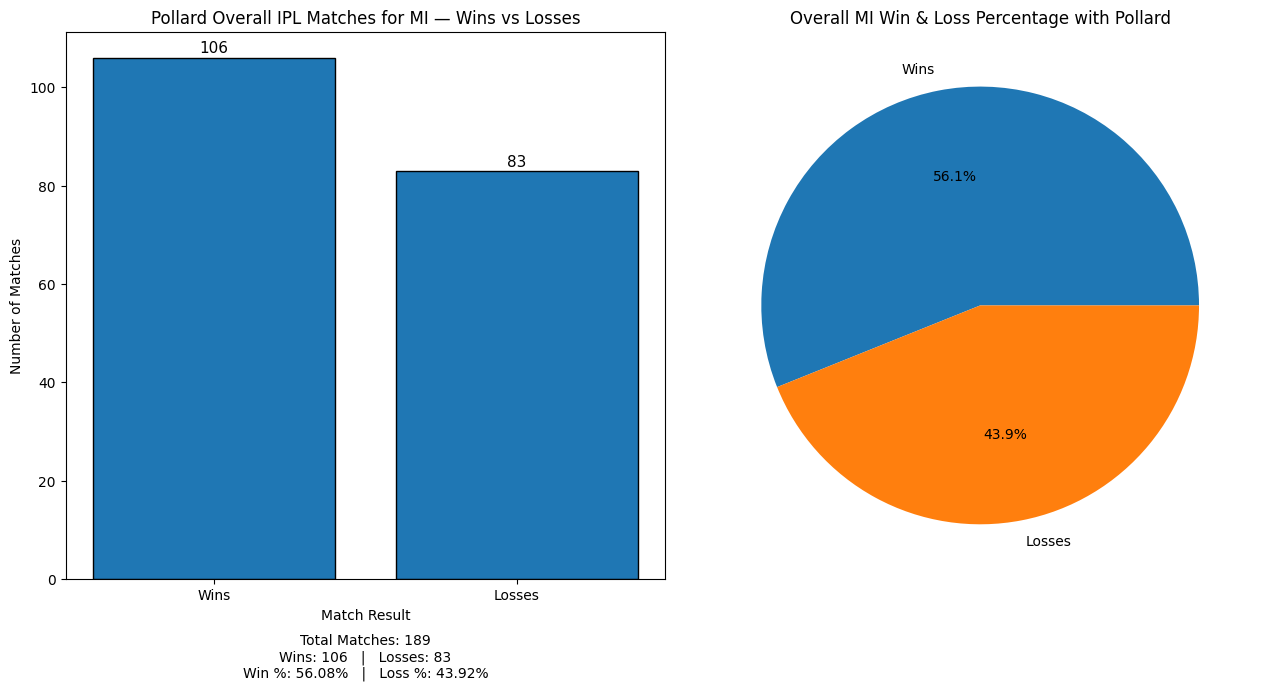

In [79]:
import matplotlib.pyplot as plt

# Values from your calculations
labels = ['Wins', 'Losses']
values = [total_win_189, total_matches_189 - total_win_189]

# ---------- Visualization ----------
fig, axes = plt.subplots(1, 2, figsize=(13, 7))

# ===== Bar Chart =====
bars = axes[0].bar(labels, values, edgecolor='black')
axes[0].set_title("Pollard Overall IPL Matches for MI — Wins vs Losses", fontsize=12)
axes[0].set_ylabel("Number of Matches")
axes[0].set_xlabel("Match Result")

# Count labels on bars
for bar, v in zip(bars, values):
    axes[0].text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 1,
        f"{v}",
        ha='center',
        fontsize=11
    )

# Summary text neatly under the chart
summary_text = (
    f"Total Matches: {total_matches_189}\n"
    f"Wins: {total_win_189}   |   Losses: {total_matches_189 - total_win_189}\n"
    f"Win %: {win_percentage_189:.2f}%   |   Loss %: {loss_percentage_189:.2f}%"
)

axes[0].text(
    0.5, -0.18,
    summary_text,
    transform=axes[0].transAxes,
    ha='center',
    fontsize=10
)

# ===== Pie Chart =====
axes[1].pie(values, labels=labels, autopct='%1.1f%%')
axes[1].set_title("Overall MI Win & Loss Percentage with Pollard", fontsize=12)

plt.tight_layout()
plt.show()


### 3.  Now analysing win rate  at different thresholds of balls faced

In [59]:
thresholds = [5,10,15,20,22,25,30] ## ---> every balls faced like >=5 ,>=10,...etc for my requirement i included 22 balls also
results = []

In [62]:
for t in thresholds:
    subset = df[df['balls_faced']>=t]
    total = len(subset)
    wins = len(subset[subset['Match result']=='Yes'])
    win_pct = (wins/total)*100
    results.append({'Balls_faced':t,'Matches':total,'Wins':wins,'Win percentage':win_pct})

In [63]:
analysis_df = pd.DataFrame(results)
print(f"Pollard faces at each ball level thresholds")
analysis_df


Pollard faces at each ball level thresholds


,Balls_faced,Matches,Wins,Win percentage
0,5,149,76,51.006711
1,10,102,52,50.980392
2,15,57,31,54.385965
3,20,39,23,58.974359
4,22,30,20,66.666667
5,25,19,14,73.684211
6,30,14,10,71.428571


#### 3.1 Visualization of Different thresholds

Pollard win performance at different balls-faced thresholds


,Balls_faced,Matches,Wins,Win percentage
0,5,149,76,51.006711
1,10,102,52,50.980392
2,15,57,31,54.385965
3,20,39,23,58.974359
4,22,30,20,66.666667
5,25,19,14,73.684211
6,30,14,10,71.428571


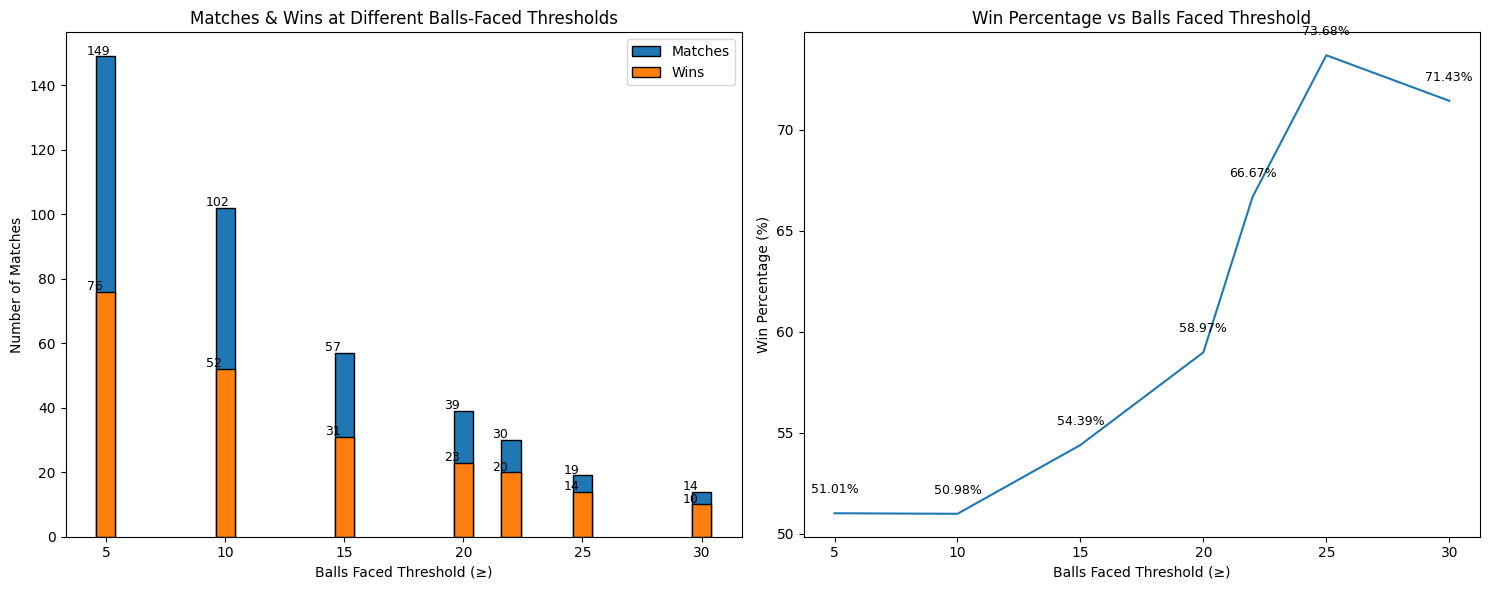

In [ ]:
import matplotlib.pyplot as plt

print("Pollard win performance at different balls-faced thresholds")
display(analysis_df)

# -----------------------------------
# Visualization
# -----------------------------------
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# ===== 1️ Bar Chart — Matches vs Wins =====
axes[0].bar(analysis_df['Balls_faced'],
            analysis_df['Matches'],
            edgecolor='black',
            label='Matches')

axes[0].bar(analysis_df['Balls_faced'],
            analysis_df['Wins'],
            edgecolor='black',
            label='Wins')

axes[0].set_title("Matches & Wins at Different Balls-Faced Thresholds", fontsize=12)
axes[0].set_xlabel("Balls Faced Threshold (≥)")
axes[0].set_ylabel("Number of Matches")
axes[0].legend()

# Add value labels
for i, v in enumerate(analysis_df['Matches']):
    axes[0].text(analysis_df['Balls_faced'][i]-0.8, v+0.5, str(v), fontsize=9)

for i, v in enumerate(analysis_df['Wins']):
    axes[0].text(analysis_df['Balls_faced'][i]-0.8, v+0.5, str(v), fontsize=9)


# ===== 2️ Line Chart — Win % Trend =====
axes[1].plot(
    analysis_df['Balls_faced'],
    analysis_df['Win percentage'],
)

axes[1].set_title("Win Percentage vs Balls Faced Threshold", fontsize=12)
axes[1].set_xlabel("Balls Faced Threshold (≥)")
axes[1].set_ylabel("Win Percentage (%)")

# Add percentage labels
for x, y in zip(analysis_df['Balls_faced'], analysis_df['Win percentage']):
    axes[1].text(x, y+1, f"{y:.2f}%", ha='center', fontsize=9)

plt.tight_layout()
plt.show()


### 4.  Now need to analyse for win percentage for pollard faces >= 22 balls and remains not out

In [24]:
df

,match_id,match_date,opponent_team,batting_innings,over,ball no,batting_position,balls_faced,runs_scored,4s,6s,strike_rate,dismissal_kind,Match result
0,1082592,2017-04-06,Rising Pune Supergiant,1st,13,4,7,17,27,3,1,158.82,caught,No
1,1082597,2017-04-09,Kolkata Knight Riders,2nd,12,2,6,17,17,1,1,100.00,caught,Yes
2,1082600,2017-04-12,Sunrisers Hyderabad,2nd,10,1,5,11,11,0,1,100.00,caught,Yes
3,1082602,2017-04-14,Royal Challengers Bangalore,2nd,2,5,6,47,70,3,5,148.94,caught,Yes
4,1082606,2017-04-16,Gujarat Lions,2nd,11,2,5,23,39,2,3,169.57,caught,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,980973,2016-05-08,Sunrisers Hyderabad,2nd,5,4,6,13,11,2,0,84.62,caught,No
185,980981,2016-05-11,Royal Challengers Bangalore,2nd,13,1,5,19,35,3,2,184.21,Not Out,Yes
186,980985,2016-05-13,Kings XI Punjab,1st,10,5,6,20,27,0,3,135.00,bowled,No
187,980993,2016-05-15,Delhi Daredevils,1st,15,1,4,6,3,0,0,50.00,caught,Yes


In [25]:
df_22_no = df[(df['balls_faced']>= 22) & (df['dismissal_kind']=='Not Out')]
wins_22_no = df_22_no[df_22_no['Match result']=='Yes']

In [26]:
total_matches_22_no = len(df_22_no)
total_wins_22_no = len(wins_22_no)
win_percentage_22_no = (total_wins_22_no/total_matches_22_no)*100
loss_percentage_22_no = 100 - win_percentage_22_no
print(f"Pollards Match Win percentage with >=22 balls and Not Out: {win_percentage_22_no:.2f}%")
print(f"Pollards Match Loss percentage with >=22 balls and Not Out: {loss_percentage_22_no:.2f}%")  
print('Total  Matches :',total_matches_22_no)
print('Total Wins :',total_wins_22_no)

Pollards Match Win percentage with >=22 balls and Not Out: 83.33%
Pollards Match Loss percentage with >=22 balls and Not Out: 16.67%
Total  Matches : 12
Total Wins : 10


#### 4.1 Visualization for win percentage for pollard faces >= 22 balls and remains not out

Pollard performance when Balls Faced ≥ 22 & Not Out
---------------------------------------------
Total Matches : 12
Total Wins    : 10
Win %  : 83.33%
Loss % : 16.67%


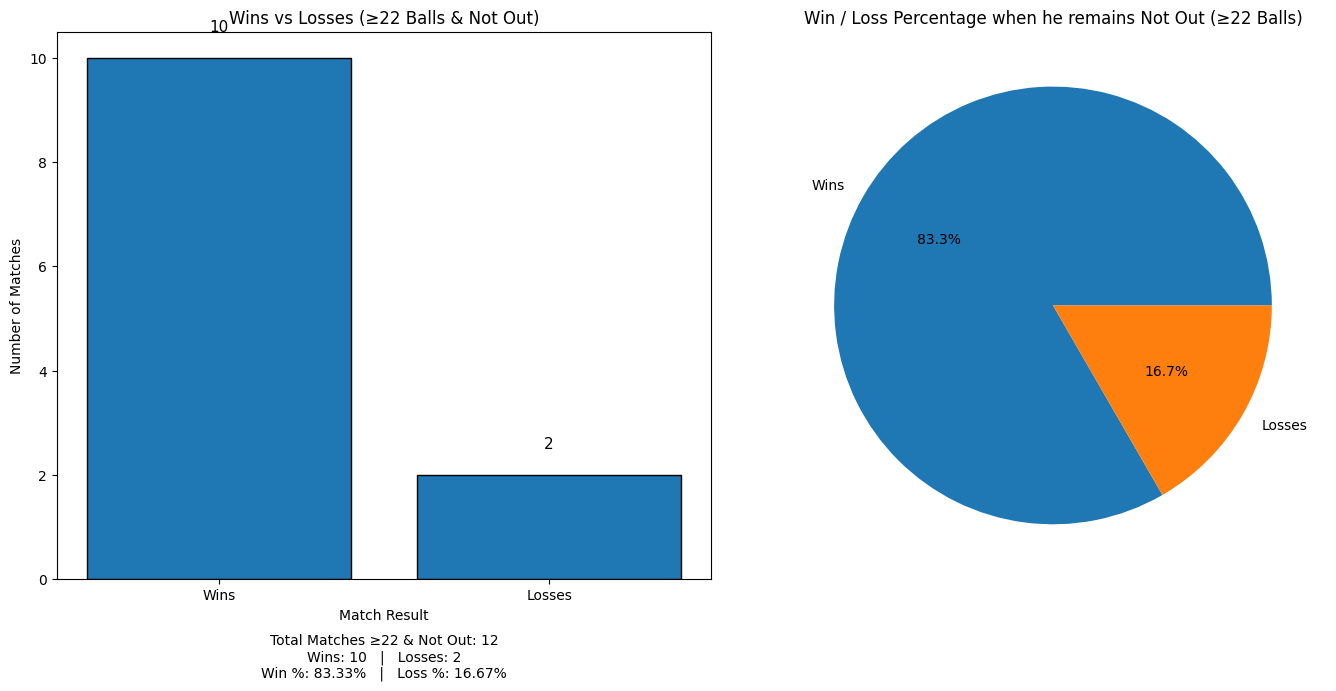

In [82]:
import matplotlib.pyplot as plt

print("Pollard performance when Balls Faced ≥ 22 & Not Out")
print("---------------------------------------------")
print("Total Matches :", total_matches_22_no)
print("Total Wins    :", total_wins_22_no)
print(f"Win %  : {win_percentage_22_no:.2f}%")
print(f"Loss % : {loss_percentage_22_no:.2f}%")

# Values
labels = ['Wins', 'Losses']
values = [total_wins_22_no, total_matches_22_no - total_wins_22_no]

# ---------- Visualization ----------
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# ===== Bar Chart (Counts) =====
bars = axes[0].bar(labels, values, edgecolor='black')
axes[0].set_title("Wins vs Losses (≥22 Balls & Not Out)")
axes[0].set_ylabel("Number of Matches")
axes[0].set_xlabel("Match Result")

# Bar value labels
for bar, v in zip(bars, values):
    axes[0].text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 0.5,
        str(v),
        ha='center',
        fontsize=11
    )

# Summary text aligned neatly
summary_text = (
    f"Total Matches ≥22 & Not Out: {total_matches_22_no}\n"
    f"Wins: {total_wins_22_no}   |   Losses: {total_matches_22_no - total_wins_22_no}\n"
    f"Win %: {win_percentage_22_no:.2f}%   |   Loss %: {loss_percentage_22_no:.2f}%"
)

axes[0].text(
    0.5, -0.18,
    summary_text,
    transform=axes[0].transAxes,
    ha='center',
    fontsize=10
)

# ===== Pie Chart =====
axes[1].pie(values, labels=labels, autopct='%1.1f%%')
axes[1].set_title("Win / Loss Percentage when he remains Not Out (≥22 Balls)")

plt.tight_layout()
plt.show()


#### Maybe If he faced >= 22 balls and MI was chasing

In [67]:
# Maybe If he faced >= 22 balls and MI was chasing

df_22_no_chasing = df[(df['batting_innings']=='2nd') & (df['balls_faced']>=22)]
total_matches_22_no_chasing = len(df_22_no_chasing)
wins_22_no_chasing = df_22_no_chasing[df_22_no_chasing['Match result']=='Yes']
total_wins_22_no_chasing = len(wins_22_no_chasing)
print('Total matches >= 22 balls and remains not out in 2nd innings :',total_matches_22_no_chasing)
print('Total win matches >= 22 balls and remains not out in 2nd innings :',total_wins_22_no_chasing)
win_percentage_22_no_chasing = (total_wins_22_no_chasing/total_matches_22_no_chasing)*100
loss_percentage_22_no_chasing = 100 - win_percentage_22_no_chasing
print(f"Pollards Match Win percentage with >=22 balls , Not Out and while chasing: {win_percentage_22_no_chasing:.2f}%")
print(f"Pollards Match Loss percentage with >=22 balls , Not Out and while chasing: {loss_percentage_22_no_chasing:.2f}%")



Total matches >= 22 balls and remains not out in 2nd innings : 13
Total win matches >= 22 balls and remains not out in 2nd innings : 8
Pollards Match Win percentage with >=22 balls , Not Out and while chasing: 61.54%
Pollards Match Loss percentage with >=22 balls , Not Out and while chasing: 38.46%


#### 4.2 Visualization of Maybe If he faced >= 22 balls and MI was chasing

---------------------------------------------
Pollard while Chasing (2nd Innings) & ≥ 22 Balls
---------------------------------------------
Total Matches : 13
Total Wins    : 8
Win %  : 61.54%
Loss % : 38.46%


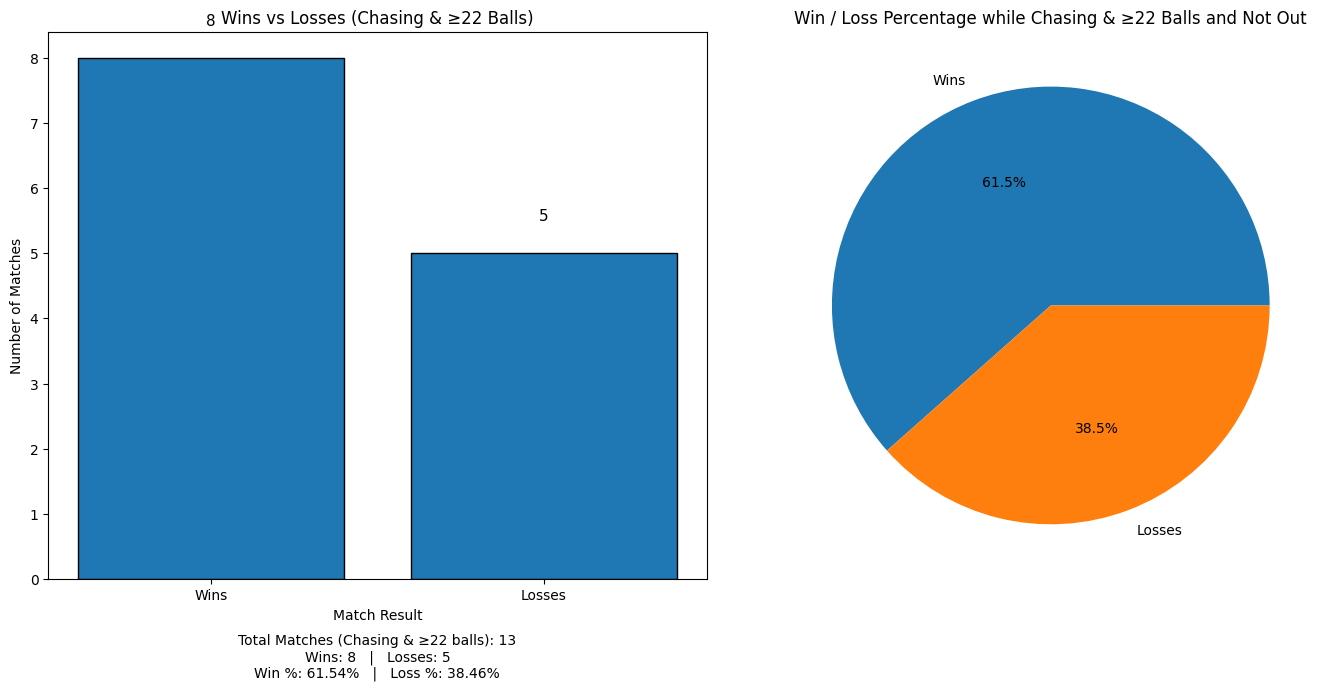

In [83]:
import matplotlib.pyplot as plt

# Values from your computed results
losses_22_no_chasing = total_matches_22_no_chasing - total_wins_22_no_chasing

print("---------------------------------------------")
print("Pollard while Chasing (2nd Innings) & ≥ 22 Balls")
print("---------------------------------------------")
print("Total Matches :", total_matches_22_no_chasing)
print("Total Wins    :", total_wins_22_no_chasing)
print(f"Win %  : {win_percentage_22_no_chasing:.2f}%")
print(f"Loss % : {loss_percentage_22_no_chasing:.2f}%")

labels = ['Wins', 'Losses']
values = [total_wins_22_no_chasing, losses_22_no_chasing]

# ---------- Visualization ----------
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# ===== Bar Chart (Counts) =====
bars = axes[0].bar(labels, values, edgecolor='black')
axes[0].set_title("Wins vs Losses (Chasing & ≥22 Balls)")
axes[0].set_ylabel("Number of Matches")
axes[0].set_xlabel("Match Result")

# Value labels on bars
for bar, v in zip(bars, values):
    axes[0].text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 0.5,
        str(v),
        ha='center',
        fontsize=11
    )

# Neatly aligned summary text
summary_text = (
    f"Total Matches (Chasing & ≥22 balls): {total_matches_22_no_chasing}\n"
    f"Wins: {total_wins_22_no_chasing}   |   Losses: {losses_22_no_chasing}\n"
    f"Win %: {win_percentage_22_no_chasing:.2f}%   |   Loss %: {loss_percentage_22_no_chasing:.2f}%"
)

axes[0].text(
    0.5, -0.18,
    summary_text,
    transform=axes[0].transAxes,
    ha='center',
    fontsize=10
)

# ===== Pie Chart =====
axes[1].pie(values, labels=labels, autopct='%1.1f%%')
axes[1].set_title("Win / Loss Percentage while Chasing & ≥22 Balls and Not Out")

plt.tight_layout()
plt.show()


#### 5. Analysis Win % when Pollard Scores > 30 runs

In [28]:
# Now what is the win percentage when pollard scores >30 runs in a match
df_30_runs = df[df['runs_scored']>30]
df_30_runs

,match_id,match_date,opponent_team,batting_innings,over,ball no,batting_position,balls_faced,runs_scored,4s,6s,strike_rate,dismissal_kind,Match result
3,1082602,2017-04-14,Royal Challengers Bangalore,2nd,2,5,6,47,70,3,5,148.94,caught,Yes
4,1082606,2017-04-16,Gujarat Lions,2nd,11,2,5,23,39,2,3,169.57,caught,Yes
10,1082635,2017-05-06,Delhi Daredevils,1st,8,5,3,35,63,5,4,180.00,Not Out,Yes
12,1082641,2017-05-11,Kings XI Punjab,2nd,11,5,5,24,50,1,5,208.33,Not Out,No
24,1136610,2018-05-16,Kings XI Punjab,1st,8,3,6,23,50,5,3,217.39,caught,Yes
30,1178394,2019-04-06,Sunrisers Hyderabad,1st,11,5,6,26,46,2,4,176.92,Not Out,Yes
31,1178399,2019-04-10,Kings XI Punjab,2nd,7,5,4,31,83,3,10,267.74,caught,Yes
41,1181768,2019-05-12,Chennai Super Kings,1st,12,5,6,25,41,3,3,164.00,Not Out,Yes
43,1216495,2020-11-03,Sunrisers Hyderabad,1st,12,2,7,25,41,2,4,164.00,bowled,No
45,1216503,2020-10-01,Kings XI Punjab,1st,13,3,5,20,47,3,4,235.00,Not Out,Yes


In [29]:
total_matches_30_runs = len(df_30_runs)
total_wins_30_runs = len(df_30_runs[df_30_runs['Match result']=='Yes'])
win_percentage_30_runs = (total_wins_30_runs/total_matches_30_runs)*100
loss_percentage_30_runs = 100 - win_percentage_30_runs
print('Total Matches when he scored > 30 runs:',total_matches_30_runs)
print('Total wins when he scored > 30 runs:',total_wins_30_runs)
print(f"Pollards Match Win percentage with >30 runs: {win_percentage_30_runs:.2f}%")
print(f"Pollards Match Loss percentage with >30 runs: {loss_percentage_30_runs:.2f}%")


Total Matches when he scored > 30 runs: 36
Total wins when he scored > 30 runs: 27
Pollards Match Win percentage with >30 runs: 75.00%
Pollards Match Loss percentage with >30 runs: 25.00%


#### 5.1 Visualization of  Win % when Pollard Scores > 30 runs

---------------------------------------------
Pollard Performance When He Scores > 30 Runs
---------------------------------------------
Total Matches : 36
Total Wins    : 27
Win %  : 75.00%
Loss % : 25.00%


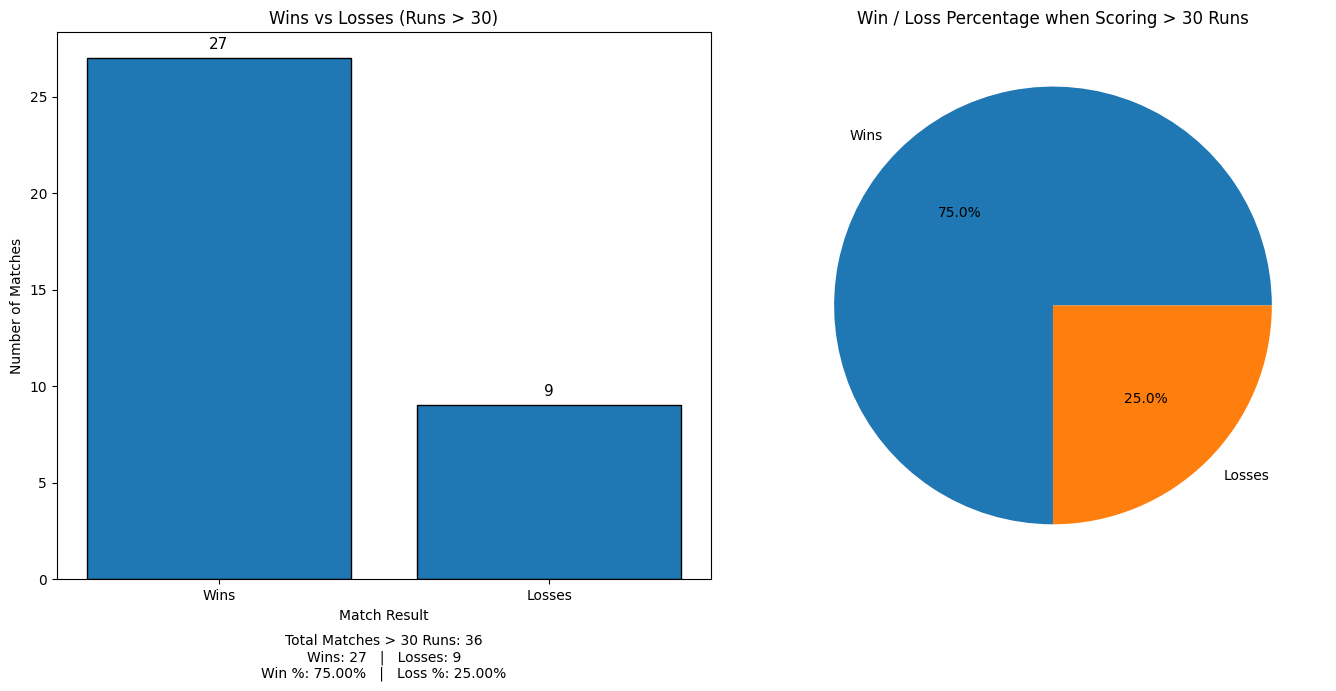

In [84]:
import matplotlib.pyplot as plt

losses_30_runs = total_matches_30_runs - total_wins_30_runs

print("---------------------------------------------")
print("Pollard Performance When He Scores > 30 Runs")
print("---------------------------------------------")
print("Total Matches :", total_matches_30_runs)
print("Total Wins    :", total_wins_30_runs)
print(f"Win %  : {win_percentage_30_runs:.2f}%")
print(f"Loss % : {loss_percentage_30_runs:.2f}%")

labels = ['Wins', 'Losses']
values = [total_wins_30_runs, losses_30_runs]

# ---------- Visualization ----------
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# ===== Bar Chart (Counts) =====
bars = axes[0].bar(labels, values, edgecolor='black')
axes[0].set_title("Wins vs Losses (Runs > 30)")
axes[0].set_ylabel("Number of Matches")
axes[0].set_xlabel("Match Result")

# Value labels on bars
for bar, v in zip(bars, values):
    axes[0].text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 0.5,
        str(v),
        ha='center',
        fontsize=11
    )

# Neatly aligned summary text
summary_text = (
    f"Total Matches > 30 Runs: {total_matches_30_runs}\n"
    f"Wins: {total_wins_30_runs}   |   Losses: {losses_30_runs}\n"
    f"Win %: {win_percentage_30_runs:.2f}%   |   Loss %: {loss_percentage_30_runs:.2f}%"
)

axes[0].text(
    0.5, -0.18,
    summary_text,
    transform=axes[0].transAxes,
    ha='center',
    fontsize=10
)

# ===== Pie Chart =====
axes[1].pie(values, labels=labels, autopct='%1.1f%%')
axes[1].set_title("Win / Loss Percentage when Scoring > 30 Runs")

plt.tight_layout()
plt.show()


### Now checking the conditions together

In [91]:

# Check specific matches to verify 'Match result' column meaning
# 2010 Final: 2010-04-25, MI vs CSK. Pollard 27 (10). Result should be 'No'.
print(df[df['match_date'] == '2010-04-25'][['opponent_team', 'runs_scored', 'balls_faced', 'Match result']])

# 2013 Final: 2013-05-26, MI vs CSK. Pollard 60 (32). Result should be 'Yes'.
print(df[df['match_date'] == '2013-05-26'][['opponent_team', 'runs_scored', 'balls_faced', 'Match result']])

# 2019 Final: 2019-05-12, MI vs CSK. Pollard 41 (25). Result should be 'Yes'.
print(df[df['match_date'] == '2019-05-12'][['opponent_team', 'runs_scored', 'balls_faced', 'Match result']])

# 2021 Final: 2021-05-1, MI vs CSK. Pollard 87 (34). Result should be 'Yes'.
print(df[df['match_date'] == '2021-05-1'][['opponent_team', 'runs_scored', 'balls_faced', 'Match result']])

          opponent_team  runs_scored  balls_faced Match result
96  Chennai Super Kings           27           10           No
           opponent_team  runs_scored  balls_faced Match result
144  Chennai Super Kings           60           32          Yes
          opponent_team  runs_scored  balls_faced Match result
41  Chennai Super Kings           41           25          Yes
          opponent_team  runs_scored  balls_faced Match result
64  Chennai Super Kings           87           34          Yes


Verifying Match Result Meaning Using IPL Finals



C:\Users\KHOWSIK\AppData\Local\Temp\ipykernel_16072\641047323.py:5: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  verification_df = df[df['match_date'].isin(check_dates)][[


,match_date,opponent_team,runs_scored,balls_faced,Match result
41,2019-05-12,Chennai Super Kings,41,25,Yes
64,2021-05-01,Chennai Super Kings,87,34,Yes
96,2010-04-25,Chennai Super Kings,27,10,No
144,2013-05-26,Chennai Super Kings,60,32,Yes


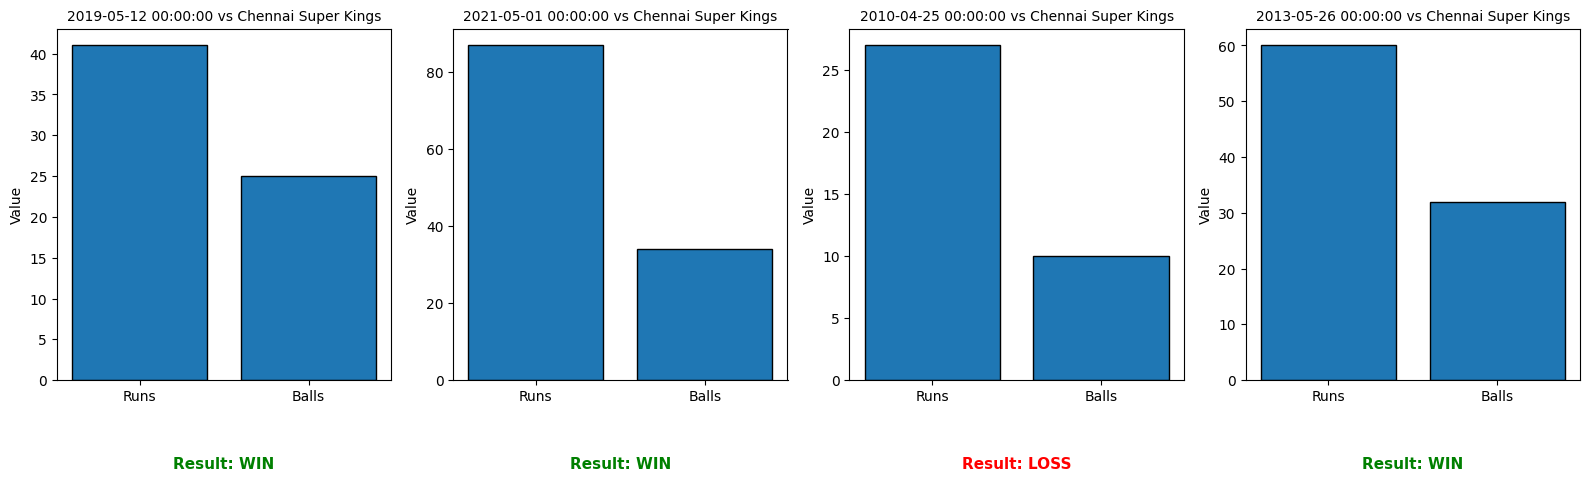

In [94]:
import matplotlib.pyplot as plt

# Extract the 3 key matches
check_dates = ['2010-04-25', '2013-05-26', '2019-05-12','2021-05-1']
verification_df = df[df['match_date'].isin(check_dates)][[
    'match_date','opponent_team','runs_scored','balls_faced','Match result'
]]

print("Verifying Match Result Meaning Using IPL Finals\n")
display(verification_df)

# -------- Visualization --------
fig, axes = plt.subplots(1, 4, figsize=(16,5))

for i, (idx, row) in enumerate(verification_df.iterrows()):
    
    result_color = 'green' if row['Match result'] == 'Yes' else 'red'
    
    axes[i].bar(['Runs','Balls'], 
                [row['runs_scored'], row['balls_faced']], 
                edgecolor='black')
    
    axes[i].set_title(f"{row['match_date']} vs {row['opponent_team']}",
                      fontsize=10)
    axes[i].set_ylabel("Value")
    
    # Add text annotation
    status_text = "WIN" if row['Match result'] == 'Yes' else "LOSS"
    
    axes[i].text(
        0.5, -0.25,
        f"Result: {status_text}",
        transform=axes[i].transAxes,
        ha='center',
        fontsize=11,
        color=result_color,
        weight='bold'
    )

plt.tight_layout()
plt.show()

### 6. Golden ERA of Kieron Pollard for MI in IPL (2013 -2021 )

In [70]:
df['Year']=pd.to_datetime(df['match_date']).dt.year
golden_era = df[(df['Year'] >=2013) & (df['Year'] <= 2021 )]
golden_era_22_balls = golden_era[golden_era['balls_faced']>=22]
total_golden_era_22_balls =len(golden_era_22_balls)
total_wins_golden_era= len(golden_era_22_balls[golden_era_22_balls['Match result']=='Yes'])
win_percentage_golden_era = (total_wins_golden_era/total_golden_era_22_balls)*100
loss_percentage_golden_era = 100 - win_percentage_golden_era

print('Total matches in golden era with >=22 balls :',total_golden_era_22_balls)
print('Total wins in golden era with >=22 balls :',total_wins_golden_era)
print(f"Pollards Match Win percentage in golden era (2013-2021) with >=22 balls: {win_percentage_golden_era:.2f}%")
print(f"Pollards Match Loss percentage in golden era (2013-2021) with >=22 balls: {loss_percentage_golden_era:.2f}%")


Total matches in golden era with >=22 balls : 26
Total wins in golden era with >=22 balls : 17
Pollards Match Win percentage in golden era (2013-2021) with >=22 balls: 65.38%
Pollards Match Loss percentage in golden era (2013-2021) with >=22 balls: 34.62%


#### 6.1 Visualzation of golden era data

------------------------------------------------------------
Pollard Golden Era Performance (2013–2021 | ≥ 22 Balls)
------------------------------------------------------------
Total Matches : 26
Total Wins    : 17
Win %  : 65.38%
Loss % : 34.62%


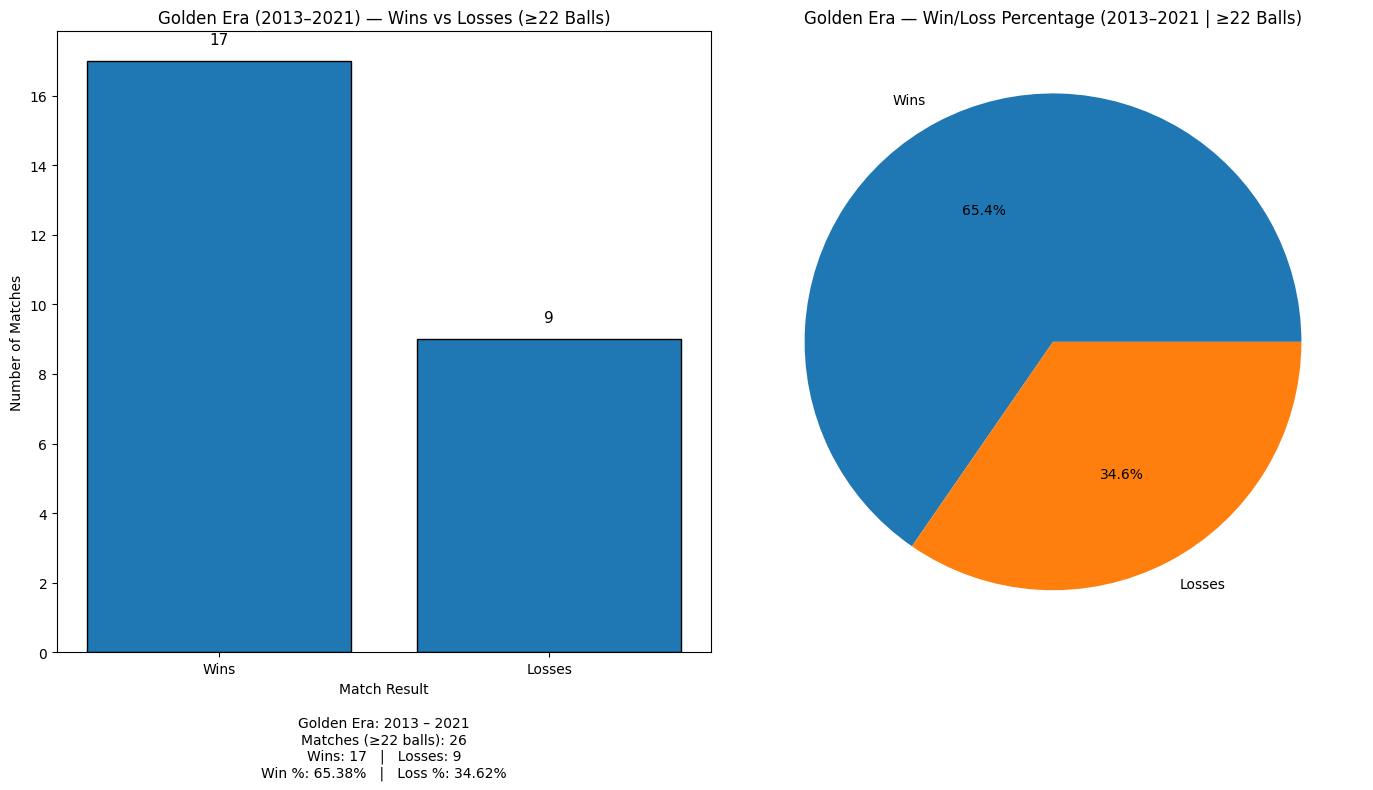

In [85]:
import matplotlib.pyplot as plt

losses_golden_era = total_golden_era_22_balls - total_wins_golden_era

print("------------------------------------------------------------")
print("Pollard Golden Era Performance (2013–2021 | ≥ 22 Balls)")
print("------------------------------------------------------------")
print("Total Matches :", total_golden_era_22_balls)
print("Total Wins    :", total_wins_golden_era)
print(f"Win %  : {win_percentage_golden_era:.2f}%")
print(f"Loss % : {loss_percentage_golden_era:.2f}%")

labels = ['Wins', 'Losses']
values = [total_wins_golden_era, losses_golden_era]

# ---------- Visualization ----------
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# ===== Bar Chart (Counts) =====
bars = axes[0].bar(labels, values, edgecolor='black')
axes[0].set_title("Golden Era (2013–2021) — Wins vs Losses (≥22 Balls)")
axes[0].set_ylabel("Number of Matches")
axes[0].set_xlabel("Match Result")

# Value labels on bars
for bar, v in zip(bars, values):
    axes[0].text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 0.5,
        str(v),
        ha='center',
        fontsize=11
    )

# Neat summary text
summary_text = (
    f"Golden Era: 2013 – 2021\n"
    f"Matches (≥22 balls): {total_golden_era_22_balls}\n"
    f"Wins: {total_wins_golden_era}   |   Losses: {losses_golden_era}\n"
    f"Win %: {win_percentage_golden_era:.2f}%   |   Loss %: {loss_percentage_golden_era:.2f}%"
)

axes[0].text(
    0.5, -0.20,
    summary_text,
    transform=axes[0].transAxes,
    ha='center',
    fontsize=10
)

# ===== Pie Chart =====
axes[1].pie(values, labels=labels, autopct='%1.1f%%')
axes[1].set_title("Golden Era — Win/Loss Percentage (2013–2021 | ≥22 Balls)")

plt.tight_layout()
plt.show()


In [ ]:
"""
Condition,                               Total Matches,  MI Wins,     MI Losses,   Win %
Pollard faces ≥22 balls,                      30,              20,       10,         66.67%
Pollard faces ≥22 balls AND stays Not Out,    12,              10,       2,          83.33%
Pollard's Career Average (Baseline),          189,             106,      83,         56.08%    

"""

### Summary visualization

,Condition,Total Matches,Wins,Losses,Win %
0,≥22 Balls,30,20,10,66.67
1,≥22 Balls & Not Out,12,10,2,83.33
2,Career Baseline,189,106,83,56.08


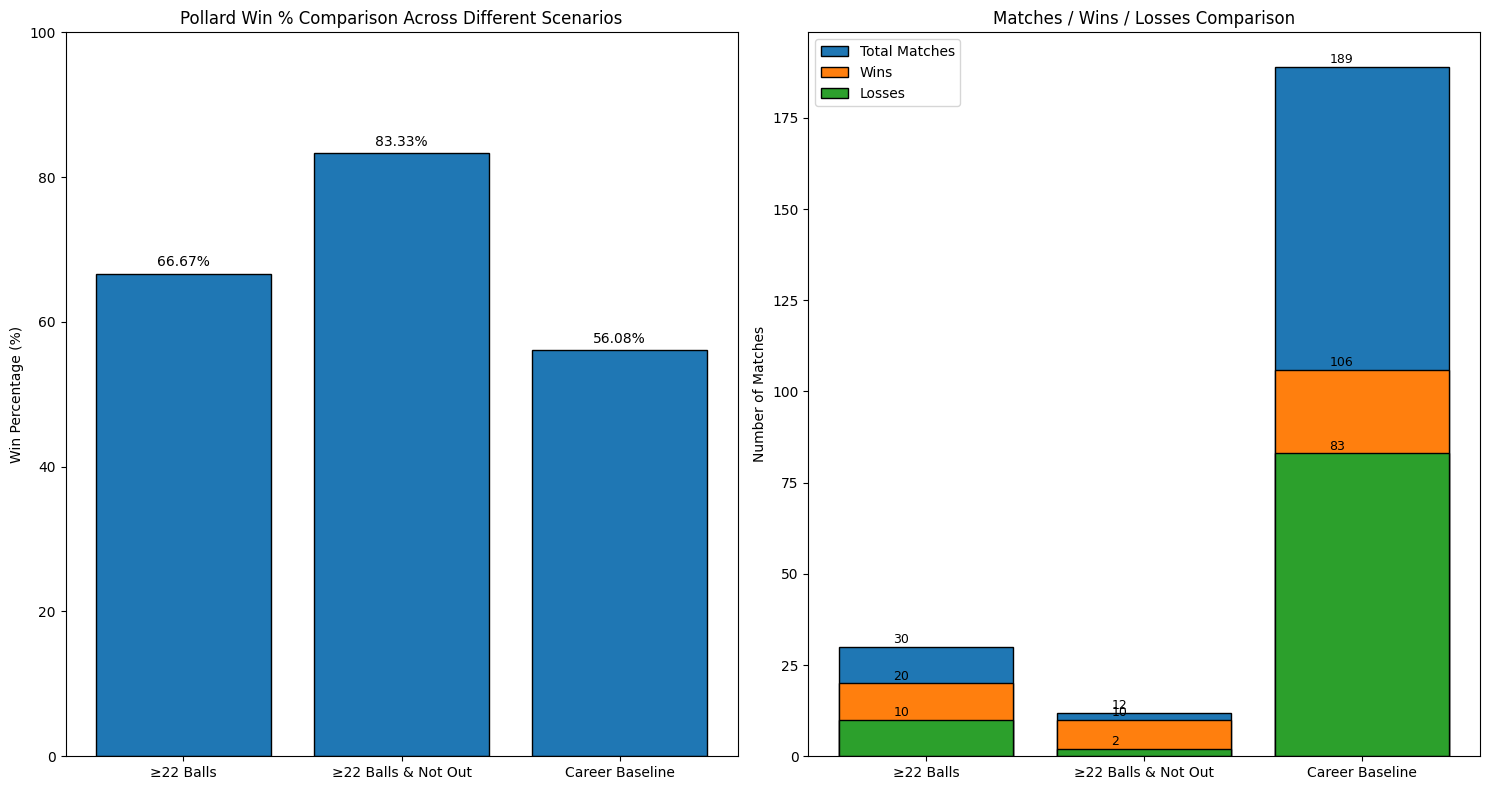

In [97]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "Condition": [
        "≥22 Balls",
        "≥22 Balls & Not Out",
        "Career Baseline"
    ],
    "Total Matches": [30, 12, 189],
    "Wins": [20, 10, 106],
    "Losses": [10, 2, 83],
    "Win %": [66.67, 83.33, 56.08]
}

summary_df = pd.DataFrame(data)
display(summary_df)

# ---------------- Visualization ----------------
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# ===== 1️⃣ Win % Comparison =====
axes[0].bar(summary_df["Condition"], summary_df["Win %"], edgecolor="black")
axes[0].set_title("Pollard Win % Comparison Across Different Scenarios", fontsize=12)
axes[0].set_ylabel("Win Percentage (%)")

# add labels
for x, y in zip(summary_df["Condition"], summary_df["Win %"]):
    axes[0].text(x, y + 1, f"{y:.2f}%", ha='center', fontsize=10)

axes[0].set_ylim(0, 100)

# ===== 2️⃣ Matches / Wins / Losses Comparison =====
axes[1].bar(summary_df["Condition"], summary_df["Total Matches"], edgecolor='black', label="Total Matches")
axes[1].bar(summary_df["Condition"], summary_df["Wins"], edgecolor='black', label="Wins")
axes[1].bar(summary_df["Condition"], summary_df["Losses"], edgecolor='black', label="Losses")

axes[1].set_title("Matches / Wins / Losses Comparison", fontsize=12)
axes[1].set_ylabel("Number of Matches")
axes[1].legend()

# value labels
for i in range(len(summary_df)):
    axes[1].text(i-0.15, summary_df["Total Matches"][i]+1, summary_df["Total Matches"][i], fontsize=9)
    axes[1].text(i-0.15, summary_df["Wins"][i]+1, summary_df["Wins"][i], fontsize=9)
    axes[1].text(i-0.15, summary_df["Losses"][i]+1, summary_df["Losses"][i], fontsize=9)

plt.tight_layout()
plt.show()
